# 1. Data wrangling<a id='1_Data_wrangling'></a>

## 1.1 Data imports<a id='1.2_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("C://Users//james//Springboard_DS//CapstoneII_BankruptcyPrediction//Data//data.csv")

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

This dataset is related to bankruptcy prediction, containing 6819 entries and 96 columns. As you can see in the above output, all of the features are numeric variables, float or int. 

## 1.2 Dataset: Target and features

The columns represent various financial ratios and metrics. Here’s a more detailed breakdown of some key aspects of the dataset.

### 1.2.1 Target Variable

Bankrupt ?: This is likely the target variable indicating whether a company is bankrupt (1) or not (0).

### 1.2.2 Features: Financial Ratios and Metrics

This dataset consists of 95 features, which can be broadly categorized into the following six groups.  

#### 1.2.2.1 Profitability Ratios: 

These ratios are used to assess a company's ability to generate profits. These ratios are typically calculated by comparing profit to other financial measures such as assets, shareholder equity, or revenue. High profitability ratios indicate that a company is generating more profit from its operations.

* ROA(C) before interest and depreciation before interest (1)
* ROA(A) before interest and % after tax (2)
* ROA(B) before interest and depreciation after tax (3)
* Operating Gross Margin (4)
* Realized Sales Gross Margin (5)
* Operating Profit Rate (6)
* Pre-tax net Interest Rate (7)
* After-tax net Interest Rate (8)
* Non-industry income and expenditure/revenue (9)
* Net Value Per Share (B) (16)
* Net Value Per Share (A) (17)
* Net Value Per Share (C) (18)
* Persistent EPS in the Last Four Seasons (19)
* Cash Flow Per Share (20)
* Revenue Per Share (Yuan) (21)
* Operating Profit Per Share (Yuan) (22)
* Per Share Net profit before tax (Yuan) (23)
* Realized Sales Gross Profit Growth Rate (24)
* Operating Profit Growth Rate (25)
* After-tax Net Profit Growth Rate (26)
* Regular Net Profit Growth Rate (27)
* Continuous Net Profit Growth Rate (28)
* Net Income to Total Assets (86)
* Net Income to Stockholder's Equity (90)

#### 1.2.2.2 Liquidity Ratios: 

The ratios are used to assess a company's ability to pay its short-term debts. These ratios are typically calculated by comparing current assets to current liabilities. A high liquidity ratio indicates that a company has enough cash and other current assets to meet its short-term obligations.

* Current Ratio (33)
* Quick Ratio (34)
* Cash Flow to Sales (75)
* Current Asset Turnover Rate (71)
* Quick Asset Turnover Rate (72)
* Working capitcal Turnover Rate (73)
* Cash Turnover Rate (74)
* Current Liability to Current Assets (84)

#### 1.2.2.3 Solvency Ratios: 

Solvency ratios are used to assess a company's ability to pay its long-term debts. These ratios typically compare a company's debt levels to its assets, equity, and earnings. A high solvency ratio indicates that a company is likely to be able to meet its long-term obligations.

* Debt ratio % (37)
* Net worth/Assets (38)
* Total debt/Total net worth (36)
* Long-term fund suitability ratio (A) (39)
* Borrowing dependency (40)
* Contingent liabilities/Net worth (41)
* Liability to Assets (60)
* Current Liabilities/Equity (66)
* Long-term Liability to Current Assets (67)
* Retained Earnings to Total Assets (68)
* Liability to Equity (91)
* Equity to Long-term Liability (79)

#### 1.2.2.4 Efficiency Ratios:

Efficiency ratios in financial analysis are metrics used to evaluate how effectively a company utilizes its assets and liabilities to generate revenues or profits. These ratios provide insights into the operational efficiency and performance of a company.

* Total Asset Turnover (45)
* Accounts Receivable Turnover (46)
* Average Collection Days (47)
* Inventory Turnover Rate (times) (48)
* Fixed Assets Turnover Frequency (49)
* Net Worth Turnover Rate (times) (50)
* Revenue per person (51)
* Operating profit per person (52)
* Inventory/Working Capital (62)
* Inventory/Current Liability (63)
* Working Capital to Equity (65)
* Cash Flow to Total Assets (80)
* Cash Flow to Liability (81)
* CFO to Assets (82)
* Cash Flow to Equity (83)

#### 1.2.2.5 Growth Ratios: 

Efficiency ratios are used to assess how well a company uses its assets and manages its expenses. These ratios typically compare a company's sales or profits to various measures of its operations. High efficiency ratios indicate that a company is using its resources effectively to generate revenue and profit.

* Total Asset Growth Rate (29)
* Net Value Growth Rate (30)
* Total Asset Return Growth Rate Ratio (31)
* Cash Reinvestment % (32)

#### 1.2.2.6 Other: 

In addition to the above categories, there are a number of other financial ratios that can be used to analyze a company's financial performance. These ratios may focus on specific aspects of a company's operations, such as its cash flow, profitability, or risk profile.

* Interest Expense Ratio (35)
* Operating profit/Paid-in capital (42)
* Net profit before tax/Paid-in capital (43)
* Inventory and accounts receivable/Net value (44)
* Working Capital to Total Assets (54)
* Quick Assets/Total Assets (55)
* Current Assets/Total Assets (56)
* Cash/Total Assets (57)
* Quick Assets/Current Liability (58)
* Cash/Current Liability (59)
* Operating Funds to Liability (61)
* Current Liability to Liability (64)
* Fixed Assets to Assets (76)
* No-credit Interval (88)
* Gross Profit to Sales (89)
* Degree of Financial Leverage (DFL) (92)
* Interest Coverage Ratio (Interest expense to EBIT) (93)
* Net Income Flag (94)
* Total assets to GNP price (87)

Later in the EDA process, we will see that there is a high likelihood of features exhibiting strong correlations within the same category.

## 1.3 Naming problem

As we can see from above information output, the variable names in the dataset have some issues, such as leading spaces and unclear naming. These issues can make data analysis more difficult. Here are the steps to clean and rename the columns for better clarity and usability:

* Remove Leading Spaces: Many column names have leading spaces that should be removed.
* Clarify Variable Names: Some names are unclear and can be made more descriptive. 

To make these works convinient, I contructed the following simple function.

In [4]:
# Function to clean column names
def clean_column_names(col):
    col = col.replace(' (times)', '') # Remove ' (times)'
    col = col.replace(' (Yuan ¥)', '') # Remove ' (Yuan ??)'
    col = col.replace('?', '')  # Remove question marks
    col = col.strip()  # Remove leading and trailing spaces
    col = col.replace(' ', '_')  # Replace spaces with underscores
    col = col.replace('%', 'pct')  # Replace % with 'percent'
    col = col.replace('/', '_to_')  # Replace / with '_to_'
    col = col.replace('(', '')  # Remove opening parentheses
    col = col.replace(')', '')  # Remove closing parentheses
    col = re.sub(r'_([a-z])', lambda x: '_' + x.group(1).upper(), col) # Convert first letter after underscore to uppercase
    return col

# Apply the function to all column names
df.columns = [clean_column_names(col) for col in df.columns]

# Display the cleaned column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Bankrupt                                               6819 non-null   int64  
 1   ROAC_Before_Interest_And_Depreciation_Before_Interest  6819 non-null   float64
 2   ROAA_Before_Interest_And_Pct_After_Tax                 6819 non-null   float64
 3   ROAB_Before_Interest_And_Depreciation_After_Tax        6819 non-null   float64
 4   Operating_Gross_Margin                                 6819 non-null   float64
 5   Realized_Sales_Gross_Margin                            6819 non-null   float64
 6   Operating_Profit_Rate                                  6819 non-null   float64
 7   Pre-tax_Net_Interest_Rate                              6819 non-null   float64
 8   After-tax_Net_Interest_Rate                     

## 1.4 Data type conversion

Next, we need to consider the data type of each column. Firstly, 'Bankrupt' is a binary target variable where one indicates bankruptcy and zero indicates otherwise. The features are numerical except for two, namely 'Net_Income_Flag' and 'Liability-Assets_Flag'. 'Net_Income_Flag' is one if net income is negative for the last two years; zero otherwise. 'Liability-Assets_Flag' is also a binary feature,  one if Total Liability exceeds Total Assets, 0 otherwise. Thus we need to change the data type of those to categorical variable.

In [5]:
# Convert binary variables to categorical
binary_columns = ['Bankrupt', 'Net_Income_Flag', 'Liability-Assets_Flag']
df[binary_columns] = df[binary_columns].astype('category')
print(df[binary_columns].dtypes)

Bankrupt                 category
Net_Income_Flag          category
Liability-Assets_Flag    category
dtype: object


In [6]:
df.head()

,Bankrupt,ROAC_Before_Interest_And_Depreciation_Before_Interest,ROAA_Before_Interest_And_Pct_After_Tax,ROAB_Before_Interest_And_Depreciation_After_Tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_Net_Interest_Rate,After-tax_Net_Interest_Rate,Non-industry_Income_And_Expenditure_To_Revenue,...,Net_Income_To_Total_Assets,Total_Assets_To_GNP_Price,No-credit_Interval,Gross_Profit_To_Sales,Net_Income_To_Stockholder's_Equity,Liability_To_Equity,Degree_Of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_Expense_To_EBIT,Net_Income_Flag,Equity_To_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## 1.5 Missing values and duplicated rows

### 1.5.1 Number of Missing Values By Column

In [7]:
# Check out the missing values
missing = pd.concat([df.isna().sum(), 100 * df.isna().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
Bankrupt,0,0.0
ROAC_Before_Interest_And_Depreciation_Before_Interest,0,0.0
Total_Expense_To_Assets,0,0.0
Total_Income_To_Total_Expense,0,0.0
Retained_Earnings_To_Total_Assets,0,0.0
...,...,...
Total_Asset_Growth_Rate,0,0.0
Continuous_Net_Profit_Growth_Rate,0,0.0
Regular_Net_Profit_Growth_Rate,0,0.0
After-tax_Net_Profit_Growth_Rate,0,0.0


All of the columns of the dataset does not have missing values.


### 1.5.2 Number of duplicated rows

Then let's check out the duplicated values.

In [8]:
# Check out duplicated values
print("The numbe of duplicated rows: ", df.duplicated().sum())

The numbe of duplicated rows:  0


There are no duplicated rows in the dataset.

## 1.6 Exploring data by type

### 1.6.1 Categorical variables

The dataset has three categorical variables, one in target and two in features.

In [9]:
df.select_dtypes('category')

,Bankrupt,Liability-Assets_Flag,Net_Income_Flag
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
6814,0,0,1
6815,0,0,1
6816,0,0,1
6817,0,0,1


#### 1.6.1.1 Target variable

The 'Bankrupt' is a binary variable. Let's investigate the proportion of bankrupt(1) and non-bankrupt(0).

C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


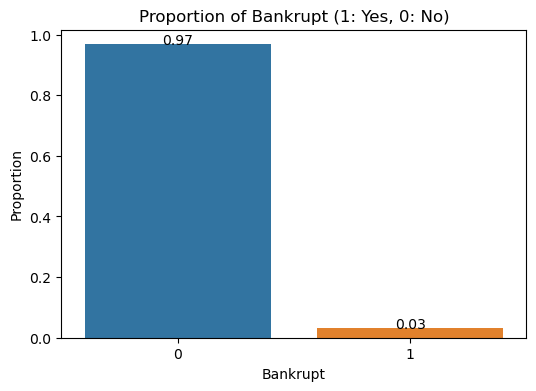

In [10]:
# 'Bankrupt' value count
value_prop = df['Bankrupt'].value_counts(normalize=True)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=value_prop.index, y=value_prop.values)

for index, value in enumerate(value_prop):
    plt.text(index, value, f"{value:.2f}", color='black', ha='center')
    
plt.xlabel('Bankrupt')
plt.ylabel('Proportion')
plt.title('Proportion of Bankrupt (1: Yes, 0: No)')
plt.show()

The target variable is highly imbalanced with 97% of 0 and 3% of 1, which can lead to various issues in model performance and evaluation. Such imbalance might cause the model to be biased towards the majority class, resulting in poor prediction accuracy for the minority class. In subsequent chapters, we will address these issues by implementing data preprocessing techniques specifically designed to handle imbalanced datasets. These techniques will help ensure that our model performs well across all classes.

#### 1.6.1.2 Categorical Features

Both of the categorical features are binary. Take a look at the proportion of one in each feature.

In [11]:
# Calculate the proportion of value 1 in 'Liability-Assets_Flag'
df[df['Liability-Assets_Flag'] == 1].shape[0]/df.shape[0] * 100

0.11731925502273059

In [12]:
# Calculate the proportion of value 1 in 'Net_Income_Flag'
df[df['Net_Income_Flag'] == 1].shape[0] / df.shape[0] * 100

100.0

Since all the values of "Net_Income_Flag" are 1, this feature does not provide any useful information for your model. It is a constant feature, which means it doesn't help in distinguishing between different data points. Thus, we can remove the feature from the dataset.

In [13]:
df.drop(columns = 'Net_Income_Flag', inplace=True)

#### 1.6.1.3. Distribution of 'Bankrupt' by 'Liability-Assets_Flag'

Even though it would be a part of EDA, I'm looking into the relationship between the 'Bankrupt'and 'Liability-Assets_Flag'.

In [14]:
bankrupt_by_LAF = df.groupby('Liability-Assets_Flag')['Bankrupt'].value_counts(normalize=True)
print(bankrupt_by_LAF)

Liability-Assets_Flag  Bankrupt
0                      0           0.96858
                       1           0.03142
1                      1           0.75000
                       0           0.25000
Name: proportion, dtype: float64


C:\Users\james\AppData\Local\Temp\ipykernel_34108\178612186.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bankrupt_by_LAF = df.groupby('Liability-Assets_Flag')['Bankrupt'].value_counts(normalize=True)


Liability-Assets Flag is found to be a significant predictor in bankruptcy prediction.

### 1.6.2 Numerical Features

In [15]:
### Numerical data summary
df_summary = df.describe().T
pd.set_option('display.max_rows', None)
df_summary

,count,mean,std,min,25%,50%,75%,max
ROAC_Before_Interest_And_Depreciation_Before_Interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROAA_Before_Interest_And_Pct_After_Tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROAB_Before_Interest_And_Depreciation_After_Tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating_Gross_Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized_Sales_Gross_Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating_Profit_Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax_Net_Interest_Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax_Net_Interest_Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry_Income_And_Expenditure_To_Revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00
Continuous_Interest_Rate_After_Tax,6819.0,7.813814e-01,1.267900e-02,0.0,7.815668e-01,7.816350e-01,7.817354e-01,1.000000e+00


In [16]:
df_summary[df_summary['max'] == 1].shape

(69, 8)

In [17]:
df_summary[df_summary['min'] == 0].shape

(93, 8)

Upon examining the summary statistics for the numerical variables, it is observed that 63 variables have a minimum value of 0 and a maximum value of 1. This suggests that these features have been normalized using their range. Variables with maximum values not equal to 1 will need further investigation. So, let's generate new sub-dataset which only contains the features with max greater than 1.

In [18]:
# Identify the columns where the max value is greater than 1
columns_with_max_greater_than_1 = df_summary.loc[df_summary['max'] > 1].index

# Create a new DataFrame with only the columns where the max value is greater than 1
df_max_greater_than_one = df.loc[:, columns_with_max_greater_than_1]

In [19]:
# Summary of df_max_greater_than_one
df_max_greater_than_one.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating_Expense_Rate,6819.0,1.995347e+09,3.237684e+09,0.0,1.566874e-04,2.777589e-04,4.145000e+09,9.990000e+09
Research_And_Development_Expense_Rate,6819.0,1.950427e+09,2.598292e+09,0.0,1.281880e-04,5.090000e+08,3.450000e+09,9.980000e+09
Interest-bearing_Debt_Interest_Rate,6819.0,1.644801e+07,1.082750e+08,0.0,2.030203e-04,3.210321e-04,5.325533e-04,9.900000e+08
Revenue_Per_Share,6819.0,1.328641e+06,5.170709e+07,0.0,1.563138e-02,2.737571e-02,4.635722e-02,3.020000e+09
Total_Asset_Growth_Rate,6819.0,5.508097e+09,2.897718e+09,0.0,4.860000e+09,6.400000e+09,7.390000e+09,9.990000e+09
Net_Value_Growth_Rate,6819.0,1.566212e+06,1.141594e+08,0.0,4.409689e-04,4.619555e-04,4.993621e-04,9.330000e+09
Current_Ratio,6819.0,4.032850e+05,3.330216e+07,0.0,7.555047e-03,1.058717e-02,1.626953e-02,2.750000e+09
Quick_Ratio,6819.0,8.376595e+06,2.446847e+08,0.0,4.725903e-03,7.412472e-03,1.224911e-02,9.230000e+09
Total_Debt_To_Total_Net_Worth,6819.0,4.416337e+06,1.684069e+08,0.0,3.007049e-03,5.546284e-03,9.273293e-03,9.940000e+09
Accounts_Receivable_Turnover,6819.0,1.278971e+07,2.782598e+08,0.0,7.101336e-04,9.678107e-04,1.454759e-03,9.740000e+09


The table above shows that the mean is much larger and the standard deviation is also very large compared to the quartile values. This indicates a potential distortion in the distribution due to outliers. We will explore the process of checking for outliers in numerical variables in the following section.

#### 1.6.2.1 Distribution of all numerical features
We create a subset of the dataset containing only the numerical features in order to examine the distribution of the numerical variables. Then, we draw a histogram of all numerical features.

In [20]:
# Seperate the numerical data from original dataset
numeric_df = df.select_dtypes(include=['number'])

# Create a list to store column names where values are greater than 1
sub_colnames = []

# Calculate the count of values greater than 1 for each numeric column and add column names with counts greater than 0 to the list
for colname in numeric_df.columns:
    if (numeric_df[colname] > 1).sum() > 0:
        sub_colnames.append(colname)

# Create a sub DataFrame containing only columns where values are greater than 1
sub_df = df[sub_colnames]

sub_df.shape

(6819, 24)

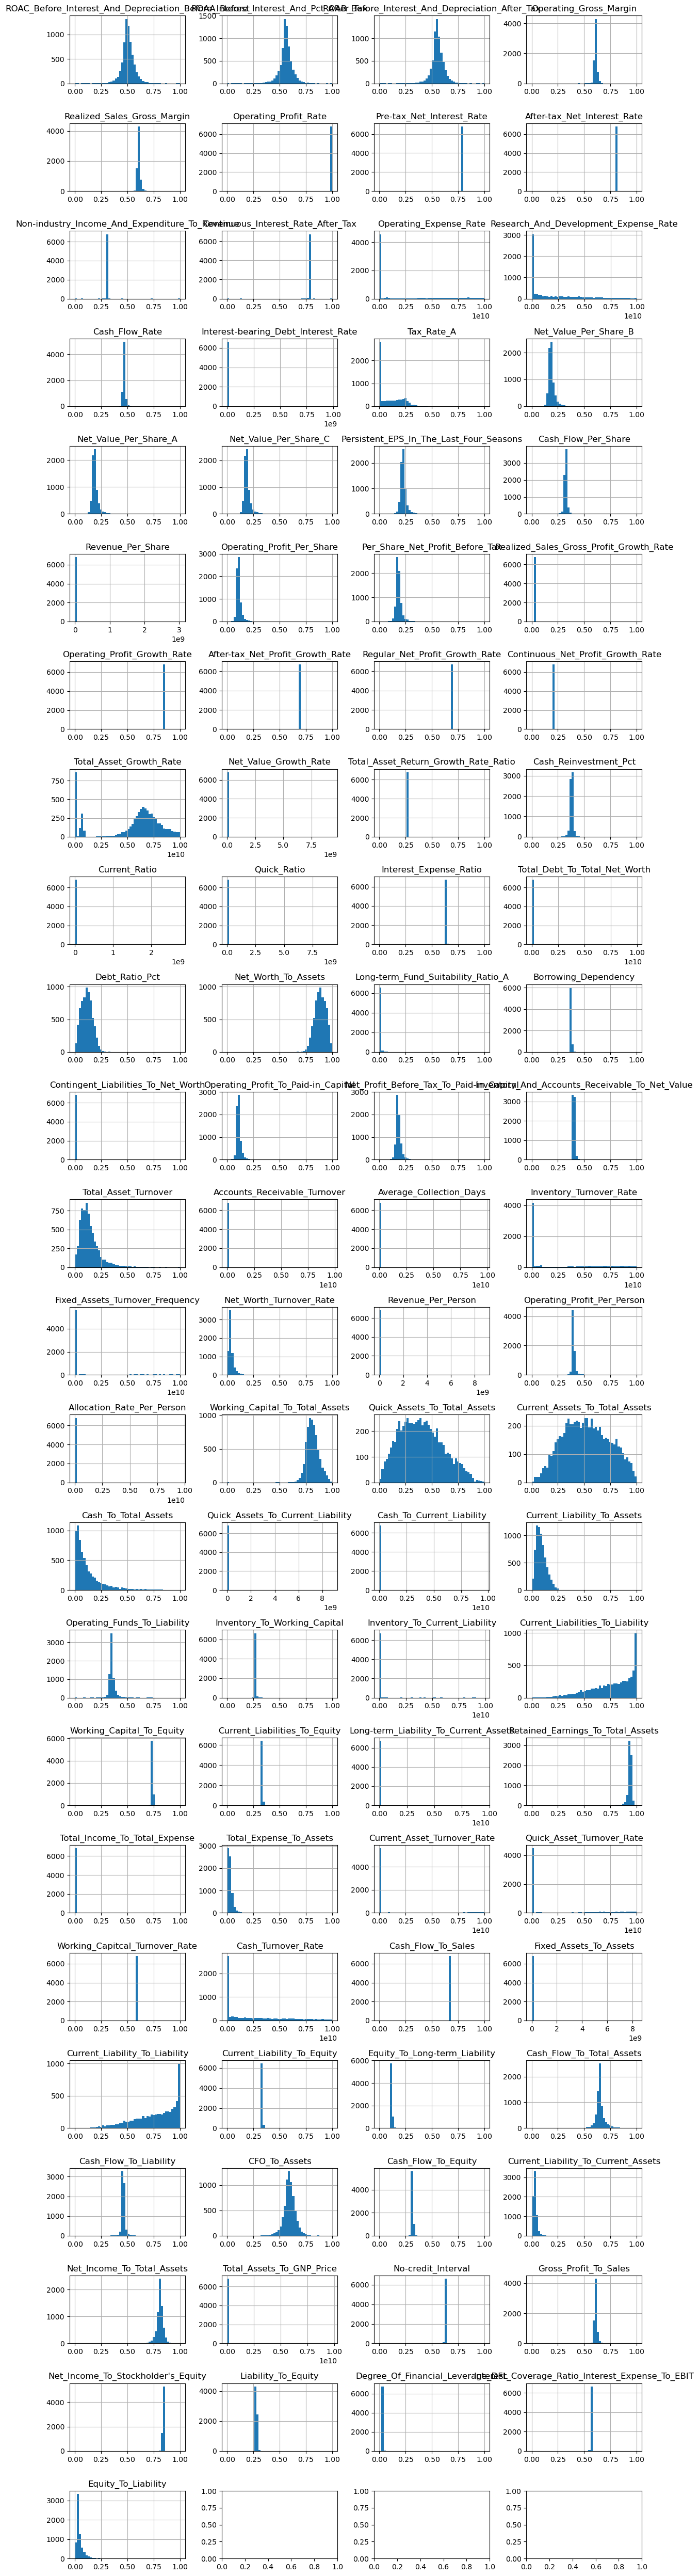

In [21]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(12, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable's histogram
for i, col in enumerate(numeric_df.columns):
    numeric_df[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

plt.show()


When examining the histograms of features, it appears that many features are concentrated in specific ranges of the data. This indicates the presence of outliers that deviate significantly from the typical distribution. Let's check the distributions after deleting outliers.

While checking for outliers could be done during the EDA stage, there are various benefits to doing it during data wrangling. These benefits include ensuring data quality and integrity before any analysis, preventing outliers from skewing the results of the analysis, and identifying potential issues early in the process which can save time and effort later on.

The following code is a function that repalces outliers with NaN.

In [22]:
def replace_outliers_with_na(data, multiplier=1.5):
    """
    Replaces outliers in each column with NaN using the IQR method.
    
    Parameters:
    - data: DataFrame containing the data
    
    Returns:
    - data_with_na: DataFrame with outliers replaced by NaN
    """
    data_with_na = data.copy()  # Create a copy of the data to avoid modifying the original
    
    # Iterate over each numerical column
    for col in data_with_na.select_dtypes(include=[np.number]).columns:
        Q1 = data_with_na[col].quantile(0.25)
        Q3 = data_with_na[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify outliers
        outliers = (data_with_na[col] < Q1 - 1.5 * IQR) | (data_with_na[col] > Q3 + multiplier * IQR)
        
        # Replace outliers with NaN
        data_with_na.loc[outliers, col] = np.nan
    
    return data_with_na

To minimize information loss, we will set the multiplier for the IQR to 3.

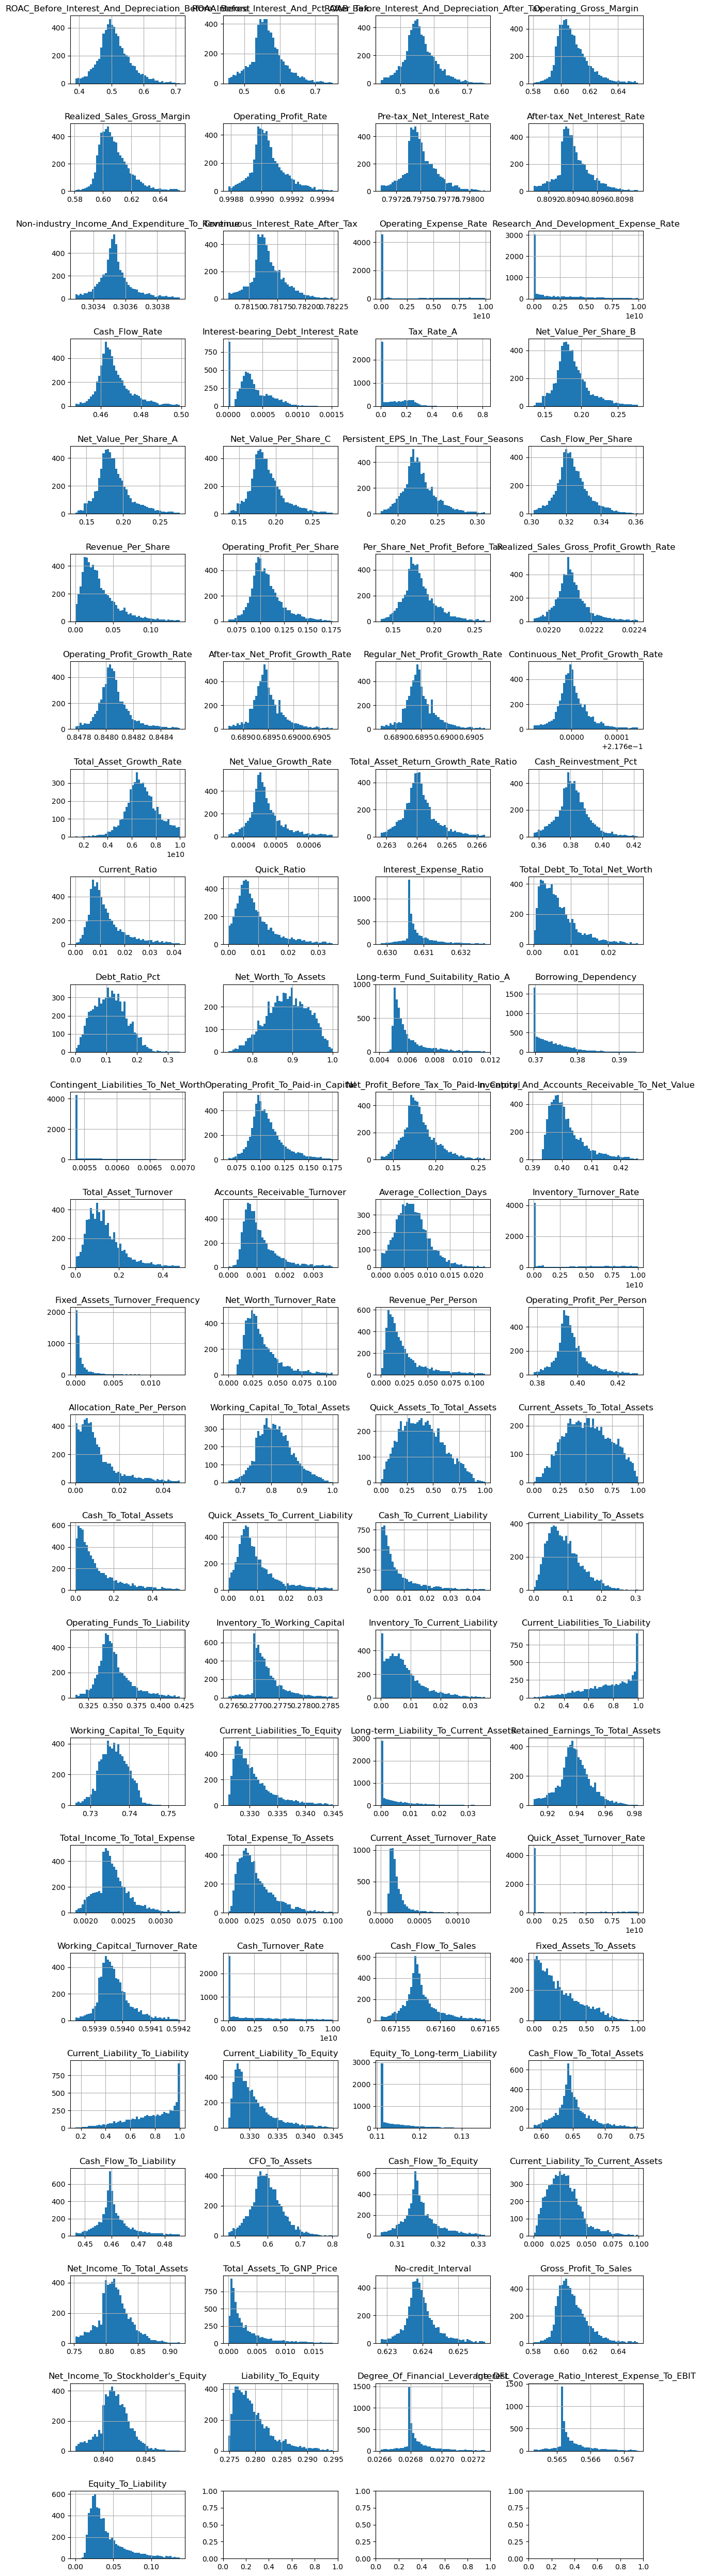

In [23]:
numeric_df_nonoutlier = replace_outliers_with_na(numeric_df, multiplier=3)

# Create the figure and axes
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(12, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable's histogram
for i, col in enumerate(numeric_df_nonoutlier.columns):
    numeric_df_nonoutlier[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

plt.show()

Replacing the outliers to NaN from each feature, the distributions seem to be much better for analysis.

Let's check the proportion of outliers of each feature.

Number of rows with at least one missing value: 5787


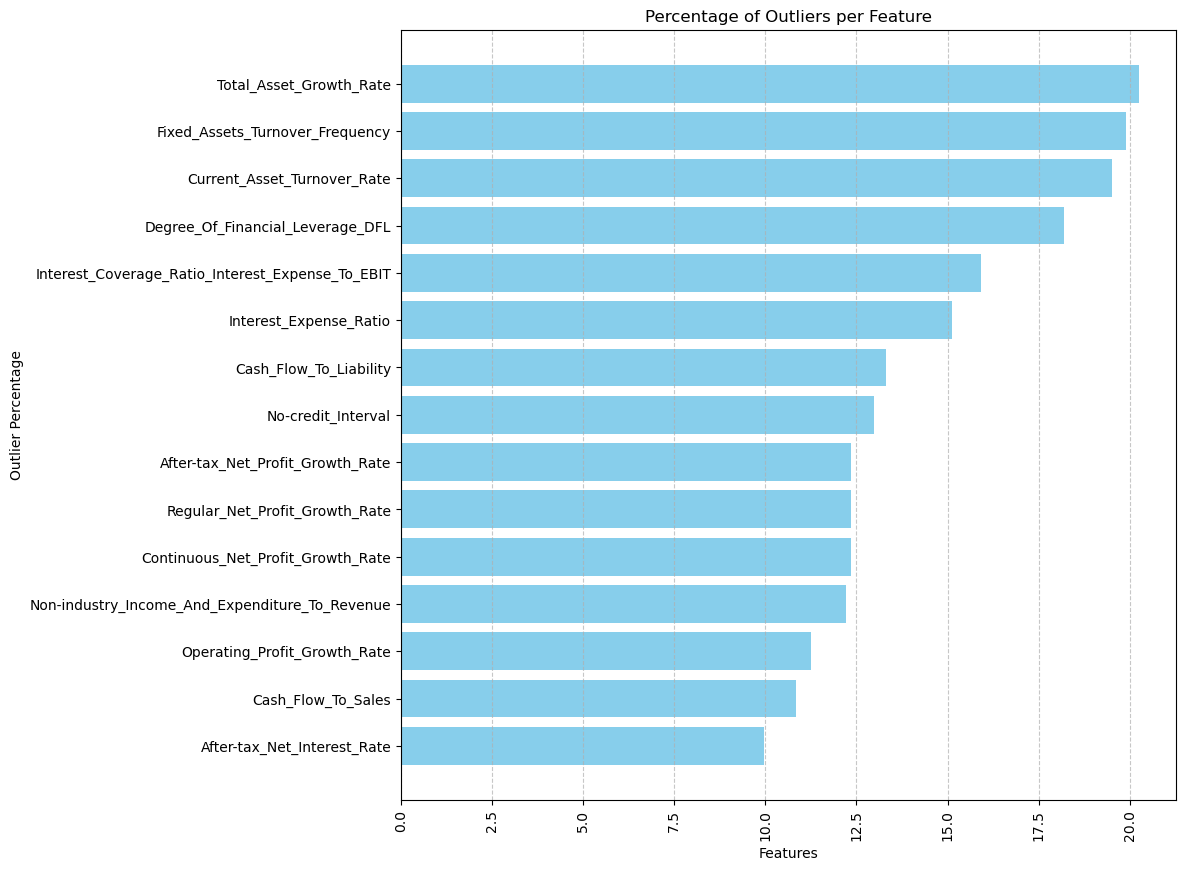

In [28]:
# Calculate missing value percentage per column
missing_percentage_per_column = (numeric_df_nonoutlier.isnull().sum() / len(numeric_df_nonoutlier)) * 100

# Sort the missing percentage values in ascending order
missing_percentage_per_column_sorted = missing_percentage_per_column.sort_values().tail(15)

# Plot the bar plot
plt.figure(figsize=(10, 10))
plt.barh(missing_percentage_per_column_sorted.index, missing_percentage_per_column_sorted.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Outlier Percentage')
plt.title('Percentage of Outliers per Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Count the number of rows with at least one missing value
rows_with_missing_values = numeric_df_nonoutlier.isnull().any(axis=1).sum()
print("Number of rows with at least one missing value:", rows_with_missing_values)

The number of features with more than 10% of outliers exceeding 3 times the IQR is 14. If rows containing NAs are removed, we would lose 5787 rows, which represents a significant loss of information. Therefore, in the subsequent EDA phase, it is necessary to delve deeper into outlier handling.